# ML modeles summarize
Conny Lin | June 22, 2020

## set up

### local computer

In [2]:
# import local libraries using host specific paths
import socket, sys, time, datetime, os, pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# get paths for local computer
hostname = socket.gethostname().split('.')[0]
# set local path settings based on computer host
if hostname == 'PFC':
    pylibrary = '/Users/connylin/Dropbox/Code/proj'
elif hostname == 'Angular-Gyrus':
    pylibrary = '/Users/connylin/Code/proj'
else:
    assert False, 'host computer not regonized'

# import local libraries
if pylibrary not in sys.path:
    sys.path.insert(1, pylibrary)
from brainstation_capstone.ml.toolbox.mlSOP import test_model
from brainstation_capstone.ml.toolbox.mlSOP import ml_timer
from brainstation_capstone.ml.toolbox.mlSOP import ModelEvaluation
from brainstation_capstone.etl.datatransform import Nutcracker

# local constants 
from brainstation_capstone.system import host_paths
LOCALPATHS = host_paths.get(hostname)
DATA_DIR = os.path.join(LOCALPATHS['Capstone'], 'data')
ML_MODELS = ['MLPClassifierSDG', 'MLPClassifierADAM', 'GradientBoostingClassifier', 'RandomForestClassifier', 'BaggingClassifier', 'LogisticRegression','RidgeClassifier','DecisionTreeClassifier', 'SVC']

# report latest run
print(f'last ran on: {hostname} {datetime.datetime.now()} PT')# import local libraries using host specific paths

getting host computer specific paths
last ran on: PFC 2020-06-24 19:05:56.145100 PT


# download and check all models are intact

In [160]:
for model_name in ML_MODELS:
    ml_model_path = os.path.join(DATA_DIR, 'ml_eval_results', 
                        model_name+'_eval.pickle')
    if not os.path.isfile(ml_model_path):
       print(f'can not find {model_name}')
print('complete checking')

complete checking


In [165]:
for model_name in ML_MODELS:
    ml_model_path = os.path.join(DATA_DIR, 'ml_eval_results', 
                        model_name+'_eval.pickle')
    model_eval_obj = pickle.load(open(ml_model_path,'rb'))
    print(f'\n{model_name}')
    print(f'\t{model_eval_obj.model.get_params()}')
print('\ncomplete checking')


MLPClassifierSDG
	{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 150, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 100, 'momentum': 0.8, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 1e-05, 'random_state': 318, 'shuffle': True, 'solver': 'sgd', 'tol': 1e-08, 'validation_fraction': 0.1, 'verbose': 1, 'warm_start': False}

MLPClassifierADAM
	{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 150, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 100, 'momentum': 0.8, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 1e-05, 'random_state': 318, 'shuffle': True, 'solver': 'adam', 'tol': 1e-08, 'validation_fraction': 0.1, 'verbose': 1, 'warm_start': False}

Gra

In [6]:
# update data dir to local machine
for model_name in ML_MODELS:
    print(f'update data dir to local {model_name}')
    ml_model_path = os.path.join(DATA_DIR, 'ml_eval_results', 
                        model_name+'_eval.pickle')
    model_eval_obj = pickle.load(open(ml_model_path,'rb'))
    model_eval_obj.update_data_dir(DATA_DIR)
    print(model_eval_obj.data_dir)
print('\ncomplete checking')

update data dir to local MLPClassifierSDG
/Users/connylin/Dropbox/CA/ED _20200119 Brain Station Data Science Diploma/Capstone/data
update data dir to local MLPClassifierADAM
/Users/connylin/Dropbox/CA/ED _20200119 Brain Station Data Science Diploma/Capstone/data
update data dir to local GradientBoostingClassifier
/Users/connylin/Dropbox/CA/ED _20200119 Brain Station Data Science Diploma/Capstone/data
update data dir to local RandomForestClassifier
/Users/connylin/Dropbox/CA/ED _20200119 Brain Station Data Science Diploma/Capstone/data
update data dir to local BaggingClassifier
/Users/connylin/Dropbox/CA/ED _20200119 Brain Station Data Science Diploma/Capstone/data
update data dir to local LogisticRegression
/Users/connylin/Dropbox/CA/ED _20200119 Brain Station Data Science Diploma/Capstone/data
update data dir to local RidgeClassifier
/Users/connylin/Dropbox/CA/ED _20200119 Brain Station Data Science Diploma/Capstone/data
update data dir to local DecisionTreeClassifier
/Users/connylin/

In [7]:
DATA_DIR != ml_model_path

True

# Logistic Regression 

In [5]:
ml_model_path = os.path.join(DATA_DIR, 'ml_eval_results', 
                    'LogisticRegression_eval.pickle')
model_eval_obj = pickle.load(open(ml_model_path,'rb'))
model = model_eval_obj.model

In [155]:
print('LogisticRegression attributes:')
print(f'\tintercept: {model.intercept_}')
print(f'\tclasses: {model.classes_}')
print(f'\tn_iter: {model.n_iter_}')
print(f'\tmodel: {model}')

LogisticRegression attributes:
	intercept: [-0.08135427]
	classes: [0. 1.]
	n_iter: [46]
	model: LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=318, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


## Logistic Regression top features

In [6]:
# get column names
nutcracker = Nutcracker()
X_columns = nutcracker.names['X']
len(X_columns)
# take a look at predictive value of each parameter
coef_df = pd.DataFrame(model.coef_[0], columns=['coef'], index=X_columns)
coef_df['coef_abs'] = np.absolute(coef_df['coef'].values)
coef_df.sort_values(by='coef_abs', ascending=False)


,coef,coef_abs
width,-3.151507,3.151507
relwidth,2.731500,2.731500
curve,-2.101670,2.101670
midline,1.161986,1.161986
kink,0.690345,0.690345
morphwidth,0.597707,0.597707
area,-0.517751,0.517751
rellength,-0.428565,0.428565
relaspect,-0.356466,0.356466
bias,-0.252349,0.252349


Top features are width, realwidth, and then curve, but previously thought it's curve.


take a look at negative and positive predictors

In [54]:
print('positive predctors')
coef_df.loc[coef_df['coef'] > 0].sort_values(by=['coef_abs'], ascending=False)


positive predctors


,coef,coef_abs
relwidth,2.731500,2.731500
midline,1.161986,1.161986
kink,0.690345,0.690345
morphwidth,0.597707,0.597707
persistence,0.235085,0.235085
angular,0.187394,0.187394
time,0.128537,0.128537
speed,0.111658,0.111658
length,0.083046,0.083046
aspect,0.077678,0.077678


In [55]:
print('negative predctors')
coef_df.loc[coef_df['coef'] < 0].sort_values(by=['coef_abs'], ascending=False)

negative predctors


,coef,coef_abs
width,-3.151507,3.151507
curve,-2.101670,2.101670
area,-0.517751,0.517751
rellength,-0.428565,0.428565
relaspect,-0.356466,0.356466
bias,-0.252349,0.252349
orient,-0.105091,0.105091
vel_y,-0.009493,0.009493
vel_x,-0.007048,0.007048


In [7]:
# get means of each group to compare
data = nutcracker.loaddata()
data.head()


,etoh,id,mwtid,time,frame,persistence,area,midline,morphwidth,width,...,kink,curve,speed,angular,bias,dir,vel_x,vel_y,orient,crab
0,0,325.0,5562.0,30.660,211.0,29.4,0.121014,0.9811,0.1023,0.2106,...,46.3,29.3,0.1956,23.9,1.0,0.0,-0.1828,-0.0694,15.4,0.0185
1,0,29.0,605.0,14.027,229.0,17.9,0.242028,1.3200,0.1689,0.4671,...,61.9,30.8,0.3136,2.7,1.0,0.0,0.0105,-0.3134,92.2,0.0016
2,0,118.0,725.0,69.963,1727.0,238.8,0.184437,1.2996,0.1221,0.2052,...,14.3,21.7,0.2837,2.0,1.0,0.0,-0.2822,-0.0294,-173.1,0.0045
3,0,537.0,4288.0,37.299,436.0,26.4,0.044469,0.5986,0.0548,0.1377,...,20.0,26.5,0.1934,17.8,1.0,0.0,-0.1910,0.0299,168.5,0.0089
4,0,209.0,4301.0,33.371,227.0,23.7,0.172044,1.2023,0.1316,0.3915,...,44.6,27.2,0.1128,1.9,1.0,0.0,0.1125,-0.0083,6.4,0.0207


In [8]:
data_mean_by_etoh = data.groupby('etoh').agg('mean').transpose()
data_mean_by_etoh['etoh_diff'] = data_mean_by_etoh.iloc[:,1] - data_mean_by_etoh.iloc[:,0]
# get etoh diff
etoh_diff = data_mean_by_etoh.loc[coef_df.index.values,'etoh_diff']
# merge to coef_df
coef_df = coef_df.join(etoh_diff)


In [59]:
#
print('positive predctors')
display(coef_df.loc[coef_df['coef'] > 0].sort_values(by=['coef_abs'], ascending=False))
print('negative predctors')
display(coef_df.loc[coef_df['coef'] < 0].sort_values(by=['coef_abs'], ascending=False))

positive predctors


,coef,coef_abs,etoh_diff
relwidth,2.731500,2.731500,-0.017748
midline,1.161986,1.161986,0.000313
kink,0.690345,0.690345,-10.470617
morphwidth,0.597707,0.597707,-0.005508
persistence,0.235085,0.235085,4.230275
angular,0.187394,0.187394,-2.862369
time,0.128537,0.128537,1.278580
speed,0.111658,0.111658,-0.023827
length,0.083046,0.083046,0.065057
aspect,0.077678,0.077678,-0.087956


negative predctors


,coef,coef_abs,etoh_diff
width,-3.151507,3.151507,-0.069808
curve,-2.101670,2.101670,-12.158920
area,-0.517751,0.517751,-0.006259
rellength,-0.428565,0.428565,-0.001260
relaspect,-0.356466,0.356466,-0.017540
bias,-0.252349,0.252349,-0.051480
orient,-0.105091,0.105091,-2.909403
vel_y,-0.009493,0.009493,0.000347
vel_x,-0.007048,0.007048,0.000657


Mean does not give you the right measure. Machine learning predictions does not correlates with mean differences.

Calculate significance of each values + p values


In [9]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm



In [117]:
anova_lm_result

,df,sum_sq,mean_sq,F,PR(>F)
etoh,1.0,15.886795,15.886795,45791.474343,0.0
Residual,1999998.0,693.874997,0.000347,NaN,NaN


In [10]:
coef_df['pvalue_anova'] = np.empty(coef_df.shape[0])
coef_df['F'] = np.empty(coef_df.shape[0])
for feature in coef_df.index.values:
    data_lm = ols(f'{feature} ~ etoh', data=data).fit()
    anova_lm_result = anova_lm(data_lm)
    coef_df.loc[feature, 'pvalue_anova'] = anova_lm_result.loc['etoh','PR(>F)']
    coef_df.loc[feature, 'F'] = anova_lm_result.loc['etoh','F']
coef_df

,coef,coef_abs,etoh_diff,pvalue_anova,F
time,0.128537,0.128537,1.278580,3.714041e-262,1.196748e+03
persistence,0.235085,0.235085,4.230275,4.190496e-249,1.136656e+03
area,-0.517751,0.517751,-0.006259,0.000000e+00,1.108624e+04
midline,1.161986,1.161986,0.000313,2.532094e-01,1.305510e+00
morphwidth,0.597707,0.597707,-0.005508,0.000000e+00,1.624879e+04
width,-3.151507,3.151507,-0.069808,0.000000e+00,3.356777e+05
relwidth,2.731500,2.731500,-0.017748,0.000000e+00,1.610303e+03
length,0.083046,0.083046,0.065057,0.000000e+00,5.246570e+04
rellength,-0.428565,0.428565,-0.001260,8.150887e-15,6.029944e+01
aspect,0.077678,0.077678,-0.087956,0.000000e+00,2.791515e+05


If logistic regression model coef strength is correlated with p value significance strength, we would expect the higher the coef, the lower the p value (negative relationship).

In [19]:
# add sign to p and F
columns_to_add_sign = ['pvalue_anova', 'F']
for column_name in columns_to_add_sign:
    column_name_new = column_name + '_sign'
    coef_df[column_name_new] = coef_df[column_name]
    ind_negative = (coef_df['coef'] < 0)
    coef_df[column_name_new].iloc[ind_negative.values] = coef_df[column_name].iloc[ind_negative.values] * -1
coef_df

,coef,coef_abs,etoh_diff,pvalue_anova,F,pvalue_anova_sign,F_sign
time,0.128537,0.128537,1.278580,3.710000e-262,1.196748e+03,3.710000e-262,1.196748e+03
persistence,0.235085,0.235085,4.230275,4.190000e-249,1.136656e+03,4.190000e-249,1.136656e+03
area,-0.517751,0.517751,-0.006259,0.000000e+00,1.108624e+04,-0.000000e+00,-1.108624e+04
midline,1.161986,1.161986,0.000313,2.532094e-01,1.305509e+00,2.532094e-01,1.305509e+00
morphwidth,0.597707,0.597707,-0.005508,0.000000e+00,1.624879e+04,0.000000e+00,1.624879e+04
width,-3.151507,3.151507,-0.069808,0.000000e+00,3.356777e+05,-0.000000e+00,-3.356777e+05
relwidth,2.731500,2.731500,-0.017748,0.000000e+00,1.610303e+03,0.000000e+00,1.610303e+03
length,0.083046,0.083046,0.065057,0.000000e+00,5.246570e+04,0.000000e+00,5.246570e+04
rellength,-0.428565,0.428565,-0.001260,8.150000e-15,6.029944e+01,-8.150000e-15,-6.029944e+01
aspect,0.077678,0.077678,-0.087956,0.000000e+00,2.791515e+05,0.000000e+00,2.791515e+05


In [21]:
# export the df table for graphing in excel
coef_df.to_csv(os.path.join(DATA_DIR, 'table_LogisticRegression_coef_anova_p.csv'))

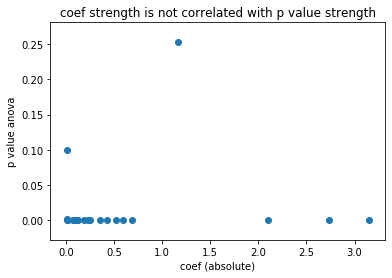

In [84]:
# correlation bewteen pvalue and coef abs
plt.figure()
plt.scatter(coef_df['coef_abs'], coef_df['pvalue_anova'])
plt.xlabel('coef (absolute)')
plt.ylabel('p value anova')
plt.title('coef strength is not correlated with p value strength')
plt.show()

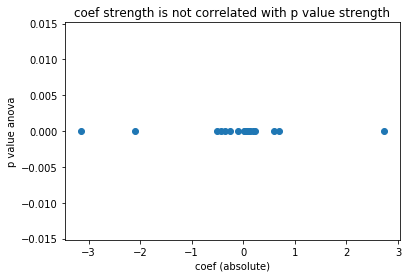

In [122]:
# take out outlier to see the lower values
coef_df_trim = coef_df.loc[coef_df['pvalue_anova'] < 0.000005,:].copy()
# correlation bewteen pvalue and coef abs
plt.figure()
plt.scatter(coef_df_trim['coef_abs'], coef_df_trim['pvalue_anova'])
plt.xlabel('coef (absolute)')
plt.ylabel('p value anova')
plt.title('coef strength is not correlated with p value strength')
plt.show()

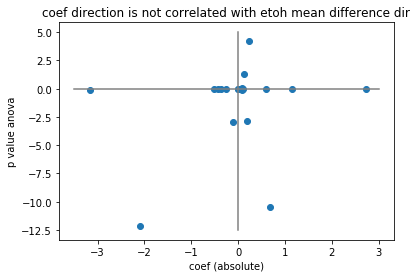

In [128]:
# correlation bewteen pvalue and coef abs
plt.figure()
plt.scatter(coef_df['coef'], coef_df['etoh_diff'])
plt.plot([-3.5, 3], [0, 0], color='gray')
plt.plot([0, 0],[-12.5, 5], color='gray')
plt.xlabel('coef (absolute)')
plt.ylabel('p value anova')
plt.title('coef direction is not correlated with etoh mean difference dir')
plt.show()

In [131]:
# plot standardized values and error bar
# get transformed data
nutcracker.mldata(feature_reduction='None')


None
None


(array([[-0.19370346, -0.01968672,  0.18197568, ...,  0.16403668,
         -0.3220815 , -0.79509773],
        [-0.0034903 ,  0.5302525 , -0.70344521, ...,  0.72855647,
          1.49370758, -0.33931424],
        [ 1.53550704,  1.31071137,  0.85580702, ..., -0.15912074,
         -0.01956178, -0.42411116],
        ...,
        [-0.29745609,  0.02476325, -0.28026611, ..., -1.0159572 ,
          0.23264978, -0.60960445],
        [ 0.74007021,  0.8780994 , -0.07844223, ...,  2.13315146,
          1.08386379,  0.41855831],
        [ 0.25589127,  0.83985175, -0.17284372, ..., -0.04648496,
          1.44608252, -0.81629696]]),
 array([[ 0.91299126, -0.05741751,  1.04135479, ...,  0.4322171 ,
          0.35137703, -0.72090041],
        [ 0.3596439 ,  1.08484347,  0.03874583, ...,  1.61087008,
         -0.38580517,  1.08633412],
        [ 0.58444127,  1.34223984,  0.28288762, ...,  0.6527955 ,
         -1.01029709,  0.74714641],
        ...,
        [-0.47037714, -0.61510964, -0.57323625, ...,  

In [154]:
# use X_test_scaled set to proof
X_train = pd.DataFrame(nutcracker.X_train_scaled, columns=nutcracker.names['X'])
X_train['etoh'] = nutcracker.y_train
X_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 19 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   area        1600000 non-null  float64
 1   midline     1600000 non-null  float64
 2   morphwidth  1600000 non-null  float64
 3   width       1600000 non-null  float64
 4   relwidth    1600000 non-null  float64
 5   length      1600000 non-null  float64
 6   rellength   1600000 non-null  float64
 7   aspect      1600000 non-null  float64
 8   relaspect   1600000 non-null  float64
 9   kink        1600000 non-null  float64
 10  curve       1600000 non-null  float64
 11  speed       1600000 non-null  float64
 12  angular     1600000 non-null  float64
 13  bias        1600000 non-null  float64
 14  dir         1600000 non-null  float64
 15  vel_x       1600000 non-null  float64
 16  vel_y       1600000 non-null  float64
 17  crab        1600000 non-null  float64
 18  etoh        1600000 no

### heatmap

In [50]:
# import data
df = pd.read_csv(os.path.join(DATA_DIR, 'table_LogisticRegression_coef_anova_p.csv'), index_col=0)

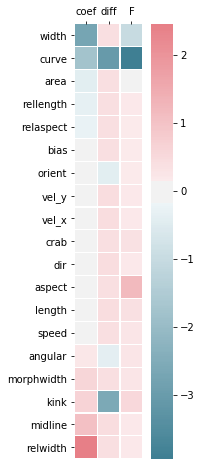

In [54]:
# scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = ['coef','etoh_diff','F_sign']
data_transformed = df[columns].iloc[2:].copy()
for c in columns:
    data = data_transformed[c].values
    data = data.reshape(-1,1)
    scaler.fit(data)
    data_transformed[c] = scaler.transform(data)
data_transformed.sort_values(by='coef', inplace=True)
data_transformed.columns = ['coef','diff','F']

import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(3,8))
ax = sns.heatmap(data_transformed, cmap=cmap, linewidth=0.1, center=0, square=True)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.show()
figure = ax.get_figure()
figure.savefig(os.path.join(DATA_DIR, 'graph_feature_LR_heatmap.png'))

In [ ]:
# need to stan

In [166]:
# TODO: do anova on scaled data


# get predictions compare which ones are mistaken by which model


In [2]:
# get predictions from each model
predictions = dict()
# for model_name in ML_MODELS:
for model_name in ML_MODELS:
    print(f'\n{model_name} ----- ')
    ml_model_path = os.path.join(DATA_DIR, 'ml_eval_results', 
                        model_name+'_eval.pickle')
    model_eval_obj = pickle.load(open(ml_model_path,'rb'))
    model_eval_obj.update_data_dir(DATA_DIR)
    predictions[model_name] = model_eval_obj.predict()



MLPClassifierSDG ----- 
loading 4 files
loading file: 0loading file: 1loading file: 2loading file: 3
loading completed
timer starts
total time: 0.012 min

MLPClassifierADAM ----- 
loading 4 files
loading file: 0loading file: 1loading file: 2loading file: 3
loading completed
timer starts
total time: 0.013 min

GradientBoostingClassifier ----- 
loading 4 files
loading file: 0loading file: 1loading file: 2loading file: 3
loading completed
timer starts
total time: 0.072 min

RandomForestClassifier ----- 
loading 4 files
loading file: 0loading file: 1loading file: 2loading file: 3
loading completed
timer starts
total time: 0.549 min

BaggingClassifier ----- 
loading 4 files
loading file: 0loading file: 1loading file: 2loading file: 3
loading completed
timer starts
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent worker

In [3]:
predictions = pd.DataFrame(predictions)
predictions

,MLPClassifierSDG,MLPClassifierADAM,GradientBoostingClassifier,RandomForestClassifier,BaggingClassifier,LogisticRegression,RidgeClassifier,DecisionTreeClassifier,SVC
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
399995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
399996,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
399997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
399998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# save this cause the above takes a long time to run
predictions.to_csv(os.path.join(DATA_DIR, 'predictions_by_model.csv'), index=False)

reload data and start fresh

In [3]:
# reload
predictions = pd.read_csv(os.path.join(DATA_DIR, 'predictions_by_model.csv'), index_col=None)


In [4]:
# load data to test
model_name = 'MLPClassifierADAM'
ml_model_path = os.path.join(DATA_DIR, 'ml_eval_results', model_name+'_eval.pickle')
model_eval_obj = pickle.load(open(ml_model_path,'rb'))
model_eval_obj.update_data_dir(DATA_DIR)
model_eval_obj.load_data()

loading 4 files
loading file: 0loading file: 1loading file: 2loading file: 3
loading completed


In [5]:
# compare which ones are wrong predictions
# get right prediction
correct_answer = np.squeeze(model_eval_obj.data['y_test'])
prediction_wrong = predictions.copy()
for c in prediction_wrong.columns:
    i = prediction_wrong[c] != correct_answer
    prediction_wrong[c] = i
ind_all_wrong = prediction_wrong.index[prediction_wrong.sum(axis=1) == prediction_wrong.shape[1]]

In [8]:
print(f'number of predictions all models got wrong: {ind_all_wrong.shape[0]}')
print(f'% of predictions all models got wrong: {ind_all_wrong.shape[0]/predictions.shape[0]*100}')

number of predictions all models got wrong: 9542
% of predictions all models got wrong: 2.3855


In [9]:
print('model incorect prediction %:')
prediction_wrong.sum(axis=0)/prediction_wrong.shape[0]*100

model incorect prediction %:


MLPClassifierSDG               8.64850
MLPClassifierADAM              8.30525
GradientBoostingClassifier     9.93575
RandomForestClassifier        10.19750
BaggingClassifier             10.79750
LogisticRegression            13.09275
RidgeClassifier               13.35575
DecisionTreeClassifier        19.18075
SVC                           24.78475
dtype: float64

In [13]:
ind_all_correct = prediction_wrong.index[prediction_wrong.sum(axis=1) == 0]
print(f'number of predictions all models got correct: {ind_all_correct.shape[0]}')
print(f'% of predictions all models got wrong: {ind_all_correct.shape[0]/predictions.shape[0]*100}')

number of predictions all models got correct: 247960
% of predictions all models got wrong: 61.99


Who are all the animals that all models predicted wrong. Do they come from certain experiments?

In [11]:
# get data frame with wrongly predicted data
nutcracker = Nutcracker()
nutcracker.mldata(feature_reduction='keep_identifier')
test_data = pd.DataFrame(nutcracker.X_test, columns=nutcracker.names['X'])
test_data['etoh'] = nutcracker.y_test

keep_identifier
feature reduction method: keep_identifier


In [27]:
# get all wrong mean
test_data_wrongly_predicted = test_data.loc[ind_all_wrong,:].copy()
mean_wrong = test_data_wrongly_predicted.groupby(by='etoh').agg('mean').transpose()
mean_wrong.columns = ['normal_all_wrong','etoh_all_wrong']
mean_wrong['diff_wrong'] = mean_wrong['etoh_all_wrong'] - mean_wrong['normal_all_wrong']
# get all correct mean
test_data_all_correct_predicted = test_data.loc[ind_all_correct,:].copy()
mean_all_correct = test_data_all_correct_predicted.groupby(by='etoh').agg('mean').transpose()
mean_all_correct.columns = ['normal_all_correct','etoh_all_correct']
mean_all_correct['diff_correct'] = mean_all_correct['etoh_all_correct'] - mean_all_correct['normal_all_correct']
# combine
mean_predict = mean_wrong.join(mean_all_correct)
mean_predict

,normal_all_wrong,etoh_all_wrong,diff_wrong,normal_all_correct,etoh_all_correct,diff_correct
id,226.633105,184.469372,-42.163733,291.037444,188.686827,-102.350616
mwtid,3878.125000,4127.544048,249.419048,3941.158322,4423.416612,482.258290
frame,924.460411,987.761604,63.301193,916.939694,974.384769,57.445075
area,0.136808,0.140146,0.003337,0.149418,0.139351,-0.010067
midline,1.069687,1.045078,-0.024609,1.093439,1.111592,0.018154
morphwidth,0.106420,0.113320,0.006900,0.114828,0.103762,-0.011066
width,0.163479,0.268216,0.104738,0.276249,0.150895,-0.125354
relwidth,0.841834,1.042277,0.200442,0.997952,0.845545,-0.152407
length,1.041586,0.908182,-0.133405,0.949092,1.088200,0.139108
rellength,1.054186,0.996153,-0.058033,1.012587,1.043717,0.031131


In [28]:
# drop columns not useful
mean_predict.drop(index=['id','mwtid','frame'], inplace=True)
mean_predict

,normal_all_wrong,etoh_all_wrong,diff_wrong,normal_all_correct,etoh_all_correct,diff_correct
area,0.136808,0.140146,0.003337,0.149418,0.139351,-0.010067
midline,1.069687,1.045078,-0.024609,1.093439,1.111592,0.018154
morphwidth,0.106420,0.113320,0.006900,0.114828,0.103762,-0.011066
width,0.163479,0.268216,0.104738,0.276249,0.150895,-0.125354
relwidth,0.841834,1.042277,0.200442,0.997952,0.845545,-0.152407
length,1.041586,0.908182,-0.133405,0.949092,1.088200,0.139108
rellength,1.054186,0.996153,-0.058033,1.012587,1.043717,0.031131
aspect,0.158342,0.306715,0.148373,0.304175,0.140710,-0.163465
relaspect,0.784797,1.029662,0.244865,0.973690,0.788238,-0.185452
kink,25.989900,49.053584,23.063684,45.755897,24.131800,-21.624098


the all wrong predictions have opposite trend (in diff_wrong) than diff_correct

In [49]:
mean_predict.shape

(18, 6)

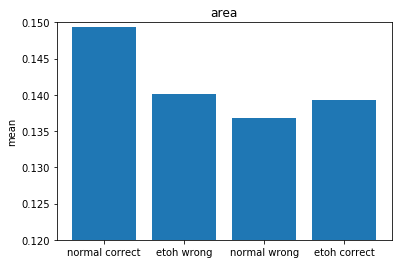

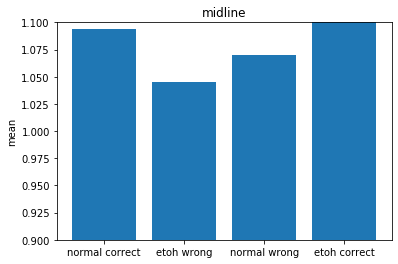

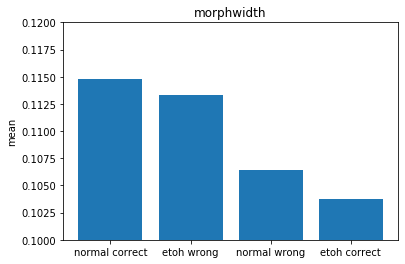

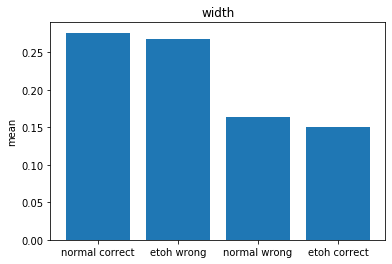

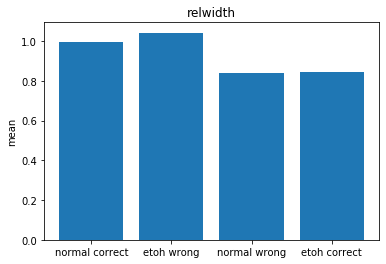

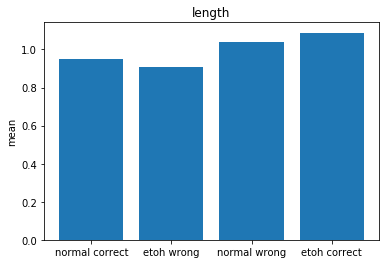

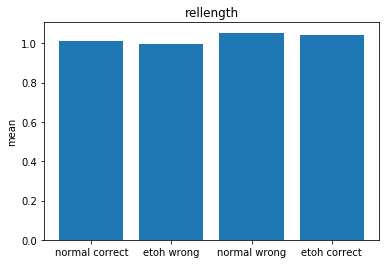

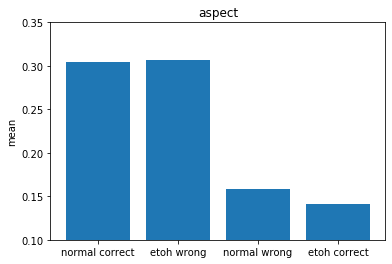

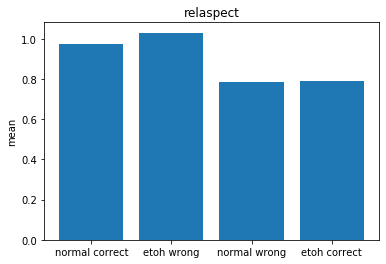

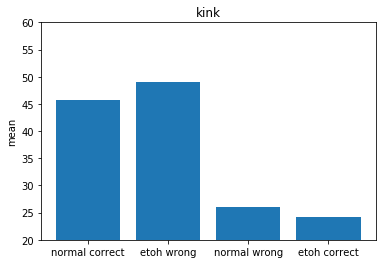

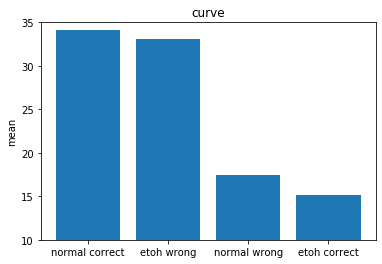

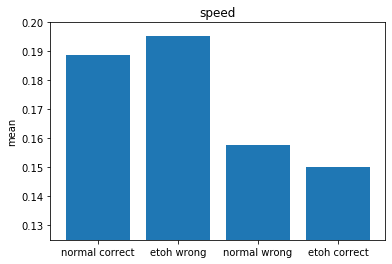

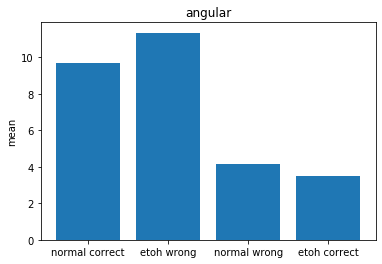

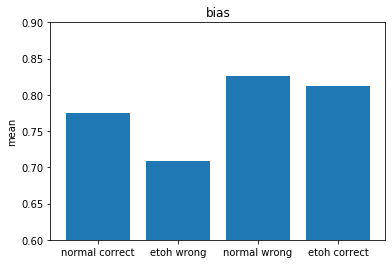

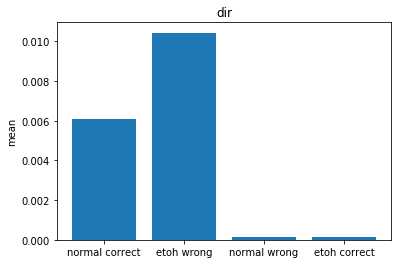

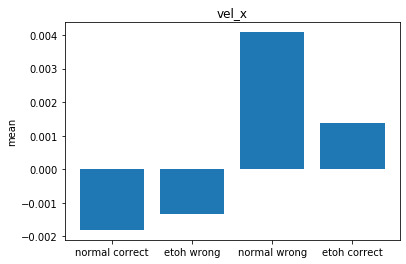

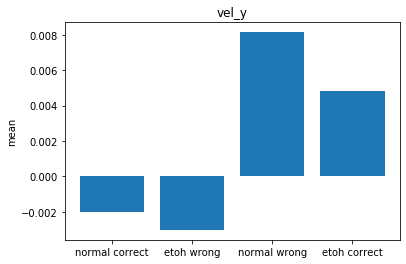

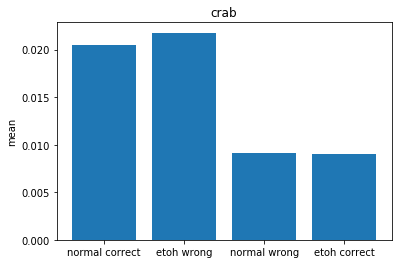

In [47]:
# graph those and see trends
plt.subplot(
for ind in mean_predict.index.values:
    graph_data = mean_predict.loc[ind,['normal_all_correct','etoh_all_wrong','normal_all_wrong','etoh_all_correct']]
    x = list(map(lambda x: x.replace('_all_',' '), graph_data.index.values)) 
    y = graph_data.values
    plt.figure()
    plt.bar(x,y)
    plt.title(ind)
    plt.ylabel('mean')
    if ind=='area':
        plt.ylim([0.12, 0.15])
    elif ind=='midline':
        plt.ylim([0.9, 1.1])
    elif ind=='morphwidth':
        plt.ylim([0.1, .12])
    # elif ind=='width':
    #     plt.ylim([0.1, .12])
    # elif ind=='relwidth':
    #     plt.ylim([0.7, .12])
    # elif ind=='length':
    #     plt.ylim([0.8, .12])
    elif ind=='relength':
        plt.ylim([0.9, .12])
    elif ind=='aspect':
        plt.ylim([0.1, .35])
    elif ind=='reaspect':
        plt.ylim([0.9, 1.1])
    elif ind=='kink':
        plt.ylim([20, 60])
    elif ind=='curve':
        plt.ylim([10, 35])
    elif ind=='speed':
        plt.ylim([.125, .2])
    elif ind=='bias':
        plt.ylim([.6, .9])
    plt.show()

Seems like the normal correct are more similar to etoh wrong and normal wrong and more similar to etoh correct. This means etoh wrong individuals look like normal and normal wrong looks more like etoh.

Make heat map.

In [78]:
data

array([[0.14941807],
       [0.13680839],
       [0.13935097],
       [0.14014582]])

In [77]:
data.reshape(1,-1)[0]

array([0.14941807, 0.13680839, 0.13935097, 0.14014582])

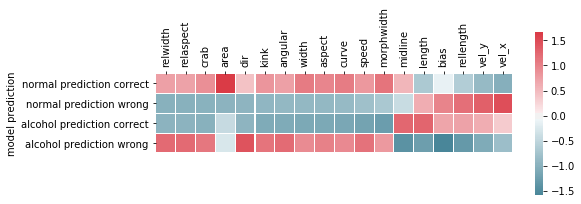

In [90]:
# make heatmap
graph_data = mean_predict.loc[:,['normal_all_correct','normal_all_wrong','etoh_all_correct','etoh_all_wrong']]
x = list(map(lambda x: x.replace('_all_',' '), graph_data.index.values)) 

# scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
graph_data_scaled = graph_data.copy()
for ind in graph_data_scaled.index.values:
    data = graph_data_scaled.loc[ind,:].values
    data = data.reshape(-1,1)
    scaler.fit(data)
    graph_data_scaled.loc[ind,:] = scaler.transform(data).reshape(1,-1)[0]
# sort values
graph_data_scaled.sort_values(by='normal_all_wrong', inplace=True)
# rename columns for better graphing
graph_data_scaled.columns = ['normal prediction correct', 'normal prediction wrong', 'alcohol prediction correct', 'alcohol prediction wrong']
# transpose
graph_data_scaled = graph_data_scaled.transpose()
# graph
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(8,3))
ax = sns.heatmap(graph_data_scaled, cmap=cmap, linewidth=0.1, center=0, square=True)
ax.xaxis.tick_top()
plt.xticks(rotation=90)
ax.xaxis.set_label_position('top')
plt.ylabel('model prediction')
plt.show()
# figure = ax.get_figure()
# figure.savefig(os.path.join(DATA_DIR, 'graph_feature_LR_heatmap.png'))

yup... when all model made the wrong prediction, it's because that animal looks like the opposite group. Also those wrong predictions tend to come from the same experiments. Some petri dishes have all of their animals predicted incorrectly. This suggests to me it's something wrong with the experiment, not the machine learning model.

## Are they from the same plates?

In [19]:
mwtid_count = test_data_wrongly_predicted['mwtid'].value_counts()
mwtid_summary = pd.DataFrame({'count': mwtid_count,
                                'pct': (mwtid_count.values / mwtid_count.sum()) * 100
                                })
mwtid_summary

,count,pct
5809.0,228,2.389436
2283.0,226,2.368476
6671.0,207,2.169357
5818.0,145,1.519598
6088.0,143,1.498638
...,...,...
3048.0,1,0.010480
2123.0,1,0.010480
5779.0,1,0.010480
4641.0,1,0.010480


In [20]:
# find out how many worms are in each mwt, and % of worms wrong
# code all wrong -1, all correct 1
test_data['all_predict_wrong'] = np.zeros(test_data.shape[0],dtype=int)
test_data.loc[ind_all_wrong, 'all_predict_wrong'] = 1
test_data['all_predict_correct'] = np.zeros(test_data.shape[0],dtype=int)
test_data.loc[ind_all_correct, 'all_predict_correct'] = 1
test_data

,id,mwtid,frame,area,midline,morphwidth,width,relwidth,length,rellength,...,speed,angular,bias,dir,vel_x,vel_y,crab,etoh,all_predict_wrong,all_predict_correct
0,74.0,3094.0,1212.0,0.181521,1.0693,0.1429,0.1026,0.494,1.0584,1.019,...,0.0837,2.0,1.0,0.002,0.0642,0.0537,0.0022,1,0,1
1,85.0,618.0,553.0,0.158193,1.2903,0.1121,0.2835,1.173,1.1988,0.991,...,0.2465,1.3,1.0,0.001,0.2400,-0.0562,0.0363,0,0,0
2,401.0,1429.0,2413.0,0.167670,1.3401,0.1196,0.3348,0.931,1.2312,1.187,...,0.1781,10.5,1.0,0.000,0.0971,-0.1493,0.0299,0,0,0
3,50.0,2114.0,1230.0,0.173502,1.0740,0.1446,0.2133,0.873,0.7560,0.846,...,0.0208,0.6,0.0,0.000,-0.0010,-0.0208,0.0012,1,0,0
4,194.0,5328.0,909.0,0.166941,1.1888,0.1308,0.2727,1.104,1.1259,0.948,...,0.2001,0.6,1.0,0.000,0.0934,-0.1770,0.0156,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,581.0,1816.0,882.0,0.061236,0.5856,0.0664,0.1269,0.708,0.5400,0.849,...,0.1121,10.4,1.0,0.000,0.0744,0.0838,0.0151,0,0,1
399996,13.0,937.0,1302.0,0.164025,1.3480,0.0949,0.0864,0.437,1.3527,1.155,...,0.0588,0.4,0.0,0.000,0.0411,0.0421,0.0221,1,0,1
399997,306.0,7046.0,879.0,0.123201,0.9614,0.0933,0.1728,0.636,0.8397,1.050,...,0.0509,2.1,0.0,0.000,0.0299,0.0412,0.0018,0,0,1
399998,70.0,1313.0,168.0,0.087480,0.8967,0.0826,0.3024,1.249,0.6912,0.938,...,0.4634,13.7,1.0,0.000,0.2069,-0.4146,0.0936,0,0,1


In [22]:
predict_summary = test_data.groupby(by='mwtid').sum()
predict_summary = predict_summary[['all_predict_wrong', 'all_predict_correct']].copy()
df = test_data.groupby(by='mwtid').count()
predict_summary['total'] = df.iloc[:,0].values
predict_summary['all_wrong_pct'] = predict_summary['all_predict_wrong']/predict_summary['total']*100
predict_summary['all_correct_pct'] = predict_summary['all_predict_correct']/predict_summary['total']*100
predict_summary

,all_predict_wrong,all_predict_correct,total,all_wrong_pct,all_correct_pct
mwtid,,,,,
0.0,0,162,200,0.000000,81.000000
11.0,13,85,209,6.220096,40.669856
12.0,1,13,53,1.886792,24.528302
13.0,11,79,235,4.680851,33.617021
14.0,0,177,295,0.000000,60.000000
...,...,...,...,...,...
7186.0,0,230,285,0.000000,80.701754
7187.0,0,158,198,0.000000,79.797980
7188.0,0,95,135,0.000000,70.370370


In [23]:
predict_summary.sort_values(by='all_wrong_pct', ascending=False)

,all_predict_wrong,all_predict_correct,total,all_wrong_pct,all_correct_pct
mwtid,,,,,
4302.0,11,0,11,100.000000,0.000000
4297.0,80,0,102,78.431373,0.000000
4298.0,101,0,136,74.264706,0.000000
4299.0,31,1,45,68.888889,2.222222
4300.0,83,0,122,68.032787,0.000000
...,...,...,...,...,...
5077.0,0,278,322,0.000000,86.335404
4863.0,0,640,779,0.000000,82.156611
4862.0,0,565,679,0.000000,83.210604


In [24]:
# save the results
predict_summary.to_csv(os.path.join(DATA_DIR, 'predict_all_model_correct_wrong_per_plate.csv'))

Seems like there is a trend. Plot

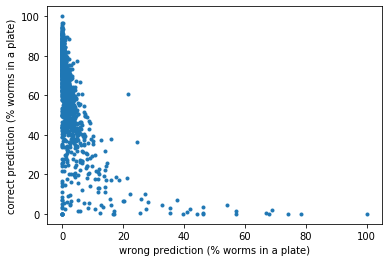

In [155]:
plt.figure()
plt.scatter(predict_summary['all_wrong_pct'], predict_summary['all_correct_pct'],
            marker='.')
plt.xlabel('wrong prediction (% worms in a plate)')
plt.ylabel('correct prediction (% worms in a plate)')
plt.show()

Seems like there are some association between wrong prediction and plates. Lets do some stats


In [161]:
from scipy import stats
r = stats.pearsonr(predict_summary['all_wrong_pct'],predict_summary['all_correct_pct'])
print(f'rho = {r[0]}\np = {r[1]}')

rho = -0.5463440908885075
p = 3.2829736322530456e-106


The relationship is significant. Let's explore which plates those are. take a look at the image of 100% predicted correct plate vs 100% predicted wrong plate. The index to mwtpat is in "mwtpath_cobolt.csv"


# Find images of wrongly predicted worms


In [109]:
# import mwt database
mwtpath = pd.read_csv(os.path.join(DATA_DIR, 'mwtpath_cobolt.csv'))
print(mwtpath.shape)
mwtpath.columns = ['mwtid','mwtpath']

# import prediction per plate data
predict_summary = pd.read_csv(os.path.join(DATA_DIR, 'predict_all_model_correct_wrong_per_plate.csv'))
predict_summary['mwtid'] = predict_summary['mwtid'].astype(int)

# add etoh label from paths
predict_summary = predict_summary.join(mwtpath, how='left', on='mwtid', lsuffix='', rsuffix='mwtpath')
predict_summary

(7294, 2)


,mwtid,all_predict_wrong,all_predict_correct,total,all_wrong_pct,all_correct_pct,mwtidmwtpath,mwtpath
0,0,0,162,200,0.000000,81.000000,0,/Volumes/COBOLT/MWT/20100201X_JC_0s0x0s0s_EE01...
1,11,13,85,209,6.220096,40.669856,11,/Volumes/COBOLT/MWT/20130523B_DH_100s30x10s10s...
2,12,1,13,53,1.886792,24.528302,12,/Volumes/COBOLT/MWT/20130523B_DH_100s30x10s10s...
3,13,11,79,235,4.680851,33.617021,13,/Volumes/COBOLT/MWT/20130523B_DH_100s30x10s10s...
4,14,0,177,295,0.000000,60.000000,14,/Volumes/COBOLT/MWT/20130523B_DH_100s30x10s10s...
...,...,...,...,...,...,...,...,...
1349,7186,0,230,285,0.000000,80.701754,7186,/Volumes/COBOLT/MWT/20190418X_XX_100s30x10s10s...
1350,7187,0,158,198,0.000000,79.797980,7187,/Volumes/COBOLT/MWT/20190418X_XX_100s30x10s10s...
1351,7188,0,95,135,0.000000,70.370370,7188,/Volumes/COBOLT/MWT/20190418X_XX_100s30x10s10s...
1352,7189,0,82,115,0.000000,71.304348,7189,/Volumes/COBOLT/MWT/20190418X_XX_100s30x10s10s...


In [146]:
ind_etoh = predict_summary['mwtpath'].str.contains(r'/N2_400mM/')
predict_summary['etoh'] = np.zeros(predict_summary.shape[0], dtype=int)
predict_summary.loc[ind_etoh, 'etoh'] = 1
predict_summary['pick'] = np.tile('None', predict_summary.shape[0])
predict_summary

,mwtid,all_predict_wrong,all_predict_correct,total,all_wrong_pct,all_correct_pct,mwtidmwtpath,mwtpath,etoh,pick
0,0,0,162,200,0.000000,81.000000,0,/Volumes/COBOLT/MWT/20100201X_JC_0s0x0s0s_EE01...,0,None
1,11,13,85,209,6.220096,40.669856,11,/Volumes/COBOLT/MWT/20130523B_DH_100s30x10s10s...,0,None
2,12,1,13,53,1.886792,24.528302,12,/Volumes/COBOLT/MWT/20130523B_DH_100s30x10s10s...,0,None
3,13,11,79,235,4.680851,33.617021,13,/Volumes/COBOLT/MWT/20130523B_DH_100s30x10s10s...,0,None
4,14,0,177,295,0.000000,60.000000,14,/Volumes/COBOLT/MWT/20130523B_DH_100s30x10s10s...,1,None
...,...,...,...,...,...,...,...,...,...,...
1349,7186,0,230,285,0.000000,80.701754,7186,/Volumes/COBOLT/MWT/20190418X_XX_100s30x10s10s...,0,None
1350,7187,0,158,198,0.000000,79.797980,7187,/Volumes/COBOLT/MWT/20190418X_XX_100s30x10s10s...,0,None
1351,7188,0,95,135,0.000000,70.370370,7188,/Volumes/COBOLT/MWT/20190418X_XX_100s30x10s10s...,0,None
1352,7189,0,82,115,0.000000,71.304348,7189,/Volumes/COBOLT/MWT/20190418X_XX_100s30x10s10s...,0,None


In [151]:
df = predict_summary.loc[ind_etoh, :].sort_values(by=['all_wrong_pct'], ascending=False)
predict_summary.loc[df.iloc[:5].index.values, 'pick'] = np.tile('top 5 wrong etoh', 5)

df = predict_summary.loc[~ind_etoh, :].sort_values(by=['all_wrong_pct'], ascending=False)
predict_summary.loc[df.iloc[:5].index.values, 'pick'] = np.tile('top 5 wrong normal', 5)

df = predict_summary.loc[ind_etoh, :].sort_values(by=['all_correct_pct'], ascending=False)
predict_summary.loc[df.iloc[:5].index.values, 'pick'] = np.tile('top 5 correct etoh', 5)

df = predict_summary.loc[~ind_etoh, :].sort_values(by=['all_correct_pct'], ascending=False)
predict_summary.loc[df.iloc[:5].index.values, 'pick'] = np.tile('top 5 correct normal', 5)

# view top 5 picks
predict_summary.loc[ predict_summary['pick'] != 'None', :]

,mwtid,all_predict_wrong,all_predict_correct,total,all_wrong_pct,all_correct_pct,mwtidmwtpath,mwtpath,etoh,pick
57,480,0,358,394,0.000000,90.862944,480,/Volumes/COBOLT/MWT/20150918C_CL_100s30x10s10s...,1,top 5 correct etoh
112,926,0,324,355,0.000000,91.267606,926,/Volumes/COBOLT/MWT/20111203C_CL_100s30x10s10s...,1,top 5 correct etoh
113,927,0,524,573,0.000000,91.448517,927,/Volumes/COBOLT/MWT/20111203C_CL_100s30x10s10s...,1,top 5 correct etoh
116,938,0,108,119,0.000000,90.756303,938,/Volumes/COBOLT/MWT/20111206C_FP_100s30x10s10s...,1,top 5 correct etoh
153,1364,55,4,119,46.218487,3.361345,1364,/Volumes/COBOLT/MWT/20121125M_FP_100s30x10s10s...,1,top 5 wrong etoh
269,2111,1,398,412,0.242718,96.601942,2111,/Volumes/COBOLT/MWT/20130308C_BM_100s30x10s10s...,0,top 5 correct normal
641,4272,0,13,13,0.000000,100.000000,4272,/Volumes/COBOLT/MWT/20170704X_CR_100s30x10s10s...,1,top 5 correct etoh
657,4297,80,0,102,78.431373,0.000000,4297,/Volumes/COBOLT/MWT/20170704X_CR_100s30x10s10s...,0,top 5 wrong normal
658,4298,101,0,136,74.264706,0.000000,4298,/Volumes/COBOLT/MWT/20170704X_CR_100s30x10s10s...,0,top 5 wrong normal
659,4299,31,1,45,68.888889,2.222222,4299,/Volumes/COBOLT/MWT/20170704X_CR_100s30x10s10s...,0,top 5 wrong normal


In [164]:
predict_summary_top5 = predict_summary.loc[ predict_summary['pick'] != 'None', :]
predict_summary_top5 

,mwtid,all_predict_wrong,all_predict_correct,total,all_wrong_pct,all_correct_pct,mwtidmwtpath,mwtpath,etoh,pick
57,480,0,358,394,0.000000,90.862944,480,/Volumes/COBOLT/MWT/20150918C_CL_100s30x10s10s...,1,top 5 correct etoh
112,926,0,324,355,0.000000,91.267606,926,/Volumes/COBOLT/MWT/20111203C_CL_100s30x10s10s...,1,top 5 correct etoh
113,927,0,524,573,0.000000,91.448517,927,/Volumes/COBOLT/MWT/20111203C_CL_100s30x10s10s...,1,top 5 correct etoh
116,938,0,108,119,0.000000,90.756303,938,/Volumes/COBOLT/MWT/20111206C_FP_100s30x10s10s...,1,top 5 correct etoh
153,1364,55,4,119,46.218487,3.361345,1364,/Volumes/COBOLT/MWT/20121125M_FP_100s30x10s10s...,1,top 5 wrong etoh
269,2111,1,398,412,0.242718,96.601942,2111,/Volumes/COBOLT/MWT/20130308C_BM_100s30x10s10s...,0,top 5 correct normal
641,4272,0,13,13,0.000000,100.000000,4272,/Volumes/COBOLT/MWT/20170704X_CR_100s30x10s10s...,1,top 5 correct etoh
657,4297,80,0,102,78.431373,0.000000,4297,/Volumes/COBOLT/MWT/20170704X_CR_100s30x10s10s...,0,top 5 wrong normal
658,4298,101,0,136,74.264706,0.000000,4298,/Volumes/COBOLT/MWT/20170704X_CR_100s30x10s10s...,0,top 5 wrong normal
659,4299,31,1,45,68.888889,2.222222,4299,/Volumes/COBOLT/MWT/20170704X_CR_100s30x10s10s...,0,top 5 wrong normal


In [165]:
# save 
predict_summary.to_csv(os.path.join(DATA_DIR, 'predict_all_model_correct_wrong_per_plate_v2.csv'))
predict_summary_top5.to_csv(os.path.join(DATA_DIR, 'predict_all_model_correct_wrong_per_plate_v2_top5.csv'))

get top 5 images

In [167]:
predict_summary_top5.head(3)

,mwtid,all_predict_wrong,all_predict_correct,total,all_wrong_pct,all_correct_pct,mwtidmwtpath,mwtpath,etoh,pick
57,480,0,358,394,0.0,90.862944,480,/Volumes/COBOLT/MWT/20150918C_CL_100s30x10s10s...,1,top 5 correct etoh
112,926,0,324,355,0.0,91.267606,926,/Volumes/COBOLT/MWT/20111203C_CL_100s30x10s10s...,1,top 5 correct etoh
113,927,0,524,573,0.0,91.448517,927,/Volumes/COBOLT/MWT/20111203C_CL_100s30x10s10s...,1,top 5 correct etoh


In [168]:
import glob, shutil

# get image from all wrong plates --
dir_save = os.path.join(DATA_DIR, 'png_prediction_v2')
if not os.path.isdir(dir_save):
    os.mkdir(dir_save)

# find png
for p, index_name, prefix in zip(predict_summary_top5['mwtpath'], predict_summary_top5['mwtid'], predict_summary_top5['pick']):
    png_path = glob.glob(p+'/*.png')
    png_path = png_path[0]
    png_name = os.path.basename(png_path)
    new_name = prefix + '_' + str(index_name) + png_name
    new_path = os.path.join(dir_save, new_name)
    print(f'copy {png_path} to')
    print(f'\t{new_path}')
    shutil.copy(png_path, new_path)




copy /Volumes/COBOLT/MWT/20150918C_CL_100s30x10s10s_slo1rescue2/N2_400mM/20150918_180532/N2_l96h20C_100s30x10s10s_C0914bf.png to
	/Users/connylin/Dropbox/CA/ED _20200119 Brain Station Data Science Diploma/Capstone/data/png_prediction_v2/top 5 correct etoh_480N2_l96h20C_100s30x10s10s_C0914bf.png
copy /Volumes/COBOLT/MWT/20111203C_CL_100s30x10s10s/N2_400mM/20111203_144452/N2_5x24_t96h20C_100s30x10s10s_C1130cc.png to
	/Users/connylin/Dropbox/CA/ED _20200119 Brain Station Data Science Diploma/Capstone/data/png_prediction_v2/top 5 correct etoh_926N2_5x24_t96h20C_100s30x10s10s_C1130cc.png
copy /Volumes/COBOLT/MWT/20111203C_CL_100s30x10s10s/N2_400mM/20111203_154504/N2_5x24_t96h20C_100s30x10s10s_C1130cd.png to
	/Users/connylin/Dropbox/CA/ED _20200119 Brain Station Data Science Diploma/Capstone/data/png_prediction_v2/top 5 correct etoh_927N2_5x24_t96h20C_100s30x10s10s_C1130cd.png
copy /Volumes/COBOLT/MWT/20111206C_FP_100s30x10s10s_Training/N2_400mM/20111206_164217/N2_5x3_e95h20C_100s30x10s10s_C

## see which worms are not predicted right, get their videos